In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

def fetch_news_titles_with_selenium(url, news_title):
    # Setup the Selenium WebDriver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    
    # Load the page
    driver.get(url)
    
    # Scroll down to load more news
    html = driver.find_element(By.TAG_NAME, 'html')
    for _ in range(20):  # Adjust the range for more or fewer scrolls
        html.send_keys(Keys.END)
        time.sleep(2)  # Wait for the page to load more items
    
    # Find all news titles
    elements = driver.find_elements(By.XPATH, '//h3[@class="Mb(5px)"]')
    for element in elements:
        news_title.append(element.text.replace("\"", ""))
    
    driver.quit()
    return news_title.copy()

# URL of the Yahoo Finance Stock Market News page
url1 = 'https://finance.yahoo.com/topic/stock-market-news'
url2 = 'https://finance.yahoo.com/topic/yahoo-finance-originals/'
url3 = 'https://finance.yahoo.com/topic/earnings/'
url4 = 'https://finance.yahoo.com/topic/economic-news/'
url5 = 'https://finance.yahoo.com/topic/personal-finance-news/'
url6 = 'https://finance.yahoo.com/topic/crypto/'
url_list = [url1, url2,url3, url4, url5, url6]
# Fetch and print the news titles
titles = []
for url in url_list:
    print(f"processing {url} ......")
    titles = fetch_news_titles_with_selenium(url, titles.copy())
    print(f"Accumulate News: {len(titles)}, {titles[-1]}")


processing https://finance.yahoo.com/topic/stock-market-news ......


KeyboardInterrupt: 

In [11]:
titles = list(set(titles))
df = pd.DataFrame(titles, columns=["News Titles"])
df.head(), df.shape

(                                         News Titles
 0  Bitcoin Spot ETFs Register Five-Day Withdrawal...
 1              Why Altcoins Were Sliding Again Today
 2  The tweak that made the forced divestment of T...
 3  Procter & Gamble Tops Wall Street Forecasts on...
 4  Stock market today: Indexes edge lower as inve...,
 (616, 1))

In [16]:
df.to_csv('titles_yahoo_financial_616.csv',index=None, encoding='utf-8')

In [2]:
df = pd.read_csv('titles_yahoo_financial_616.csv', encoding='utf-8')
df.head()

,News Titles
0,Bitcoin Spot ETFs Register Five-Day Withdrawal...
1,Why Altcoins Were Sliding Again Today
2,The tweak that made the forced divestment of T...
3,Procter & Gamble Tops Wall Street Forecasts on...
4,Stock market today: Indexes edge lower as inve...


In [18]:
df['News Titles'][16]

'Worldcoin, Sam Altman’s eye-scanning crypto project, announces its own blockchain'

[nltk_data] Downloading package stopwords to C:\Users\Roy
[nltk_data]     Ma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


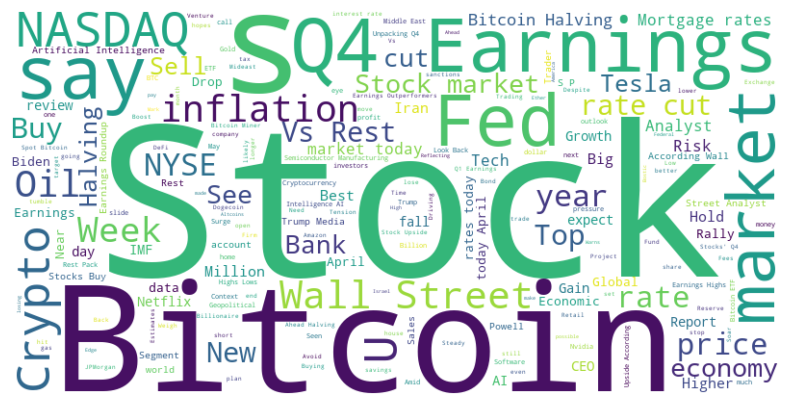

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Ensure that NLTK's stopwords are available
nltk.download('stopwords')

# Concatenate all the news titles into a single string
text = ' '.join(df['News Titles'].tolist())

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the text
filtered_text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(filtered_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
